##### Let's change gears and talk about Game of thrones or shall I say Network of Thrones.

It is suprising right? What is the relationship between a fatansy TV show/novel and network science or python(it's not related to a dragon).

If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.

![](images/got.png)

Andrew J. Beveridge, an associate professor of mathematics at Macalester College, and Jie Shan, an undergraduate created a network from the book A Storm of Swords by extracting relationships between characters to find out the most important characters in the book(or GoT).

The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions. 

Credits:

Blog: https://networkofthrones.wordpress.com

Math Horizons Article: https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##### Let's load in the datasets

In [4]:
book1 = pd.read_csv('datasets/game_of_thrones_network/asoiaf-book1-edges.csv')
book2 = pd.read_csv('datasets/game_of_thrones_network/asoiaf-book2-edges.csv')
book3 = pd.read_csv('datasets/game_of_thrones_network/asoiaf-book3-edges.csv')
book4 = pd.read_csv('datasets/game_of_thrones_network/asoiaf-book4-edges.csv')
book5 = pd.read_csv('datasets/game_of_thrones_network/asoiaf-book5-edges.csv')

The resulting DataFrame book1 has 5 columns: Source, Target, Type, weight, and book. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.



In [5]:
book1

Source              Target        Type  weight  \
0                     Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                     Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                  Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                  Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4    Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   
5    Aemon-Targaryen-(Maester-Aemon)         Bowen-Marsh  Undirected       4   
6    Aemon-Targaryen-(Maester-Aemon)               Chett  Undirected       9   
7    Aemon-Targaryen-(Maester-Aemon)              Clydas  Undirected       5   
8    Aemon-Targaryen-(Maester-Aemon)        Jeor-Mormont  Undirected      13   
9    Aemon-Targaryen-(Maester-Aemon)            Jon-Snow  Undirected      34   
10   Aemon-Targaryen-(Maester-Aemon)       Samwell-Tarly  Undirected       5   
11                Aerys-II-Targaryen       Brandon-Stark  Undirected       4   
12                Aerys-II-Targaryen        Eddard-Stark  Undirected      10   
13                Aerys-II-Targaryen    Gerold-Hightower  Undirected       3   
14                Aerys-II-Targaryen     Jaime-Lannister  Undirected       5   
15                Aerys-II-Targaryen           Jon-Arryn  Undirected       3   
16                Aerys-II-Targaryen    Robert-Baratheon  Undirected      12   
17                              Aggo  Daenerys-Targaryen  Undirected      11   
18                              Aggo               Drogo  Undirected       6   
19                              Aggo               Jhogo  Undirected       4   
20                              Aggo       Jorah-Mormont  Undirected       5   
21                              Aggo               Quaro  Undirected       3   
22                              Aggo             Rakharo  Undirected       7   
23                            Albett              Halder  Undirected       3   
24                            Albett            Jon-Snow  Undirected       5   
25                            Albett                Rast  Undirected       3   
26                    Alliser-Thorne         Bowen-Marsh  Undirected       3   
27                    Alliser-Thorne               Grenn  Undirected       3   
28                    Alliser-Thorne              Halder  Undirected       4   
29                    Alliser-Thorne        Jeor-Mormont  Undirected      10   
..                               ...                 ...         ...     ...   
654                    Rodrik-Cassel       Theon-Greyjoy  Undirected       6   
655                    Rodrik-Cassel    Tyrion-Lannister  Undirected      10   
656                    Rodrik-Cassel         Willis-Wode  Undirected       7   
657                     Roose-Bolton     Tywin-Lannister  Undirected       4   
658                   Sandor-Clegane         Sansa-Stark  Undirected      23   
659                   Sandor-Clegane    Tyrion-Lannister  Undirected       5   
660                      Sansa-Stark   Stannis-Baratheon  Undirected       3   
661                      Sansa-Stark              Tomard  Undirected       3   
662                      Sansa-Stark    Tyrion-Lannister  Undirected       3   
663                      Sansa-Stark               Varys  Undirected       4   
664                             Shae    Tyrion-Lannister  Undirected      12   
665                           Shagga              Timett  Undirected       4   
666                           Shagga    Tyrion-Lannister  Undirected      17   
667                           Shagga     Ulf-son-of-Umar  Undirected       4   
668                Stannis-Baratheon     Tywin-Lannister  Undirected       4   
669                Stannis-Baratheon               Varys  Undirected       5   
670                     Stevron-Frey         Walder-Frey  Undirected       3   
671                    Theon-Greyjoy    Tyrion-Lannister  Undirected       3   
672                    Theon-G

Once we have the data loaded as a pandas DataFrame, it's time to create a network. We create a graph for each book. It's possible to create one MultiGraph instead of 5 graphs, but it is easier to play with different graphs.

In [6]:
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

Let's populate the graph with edges from the pandas DataFrame.

In [7]:
for row in book1.iterrows():
    G_book1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [8]:
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [9]:
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

Let's have a look at these edges.

In [10]:
list(G_book1.edges(data=True))[16]

('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3, 'book': 1})

In [11]:
list(G_book1.edges(data=True))[400]

('Benjen-Stark', 'Theon-Greyjoy', {'weight': 4, 'book': 1})

### Finding the most important node i.e character in these networks.

Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network Science offers us many different metrics to measure the importance of a node in a network as we saw in the first part of the tutorial. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.

First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called degree centrality.

Using this measure, let's extract the top ten important characters from the first book (book[0]) and the fifth book (book[4]).

In [12]:
deg_cen_book1 = nx.degree_centrality(books[0])

In [13]:
deg_cen_book5 = nx.degree_centrality(books[4])

In [14]:
sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [15]:
sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

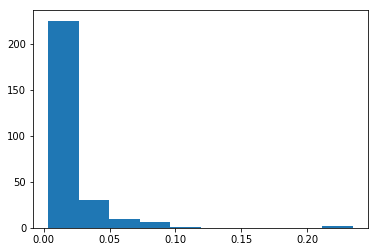

In [16]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G_book4).values()))
plt.show()

### Exercise

Create a new centrality measure, weighted_degree(Graph, weight) which takes in Graph and the weight attribute and returns a weighted degree dictionary. Weighted degree is calculated by summing the weight of the all edges of a node and find the top five characters according to this measure. [5 mins]

In [ ]:
def weighted_degree(G, weight):
    result = dict()
    for node in G.nodes():
        weight_degree = 0
        for n in G.edges([node], data=True):
            weight_degree += ____________
        result[node] = weight_degree
    return result

In [ ]:
plt.hist(___________)
plt.show()

In [ ]:
sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

### Let's do this for Betweeness centrality and check if this makes any difference

Haha, evil laugh

In [ ]:
# First check unweighted, just the structure

sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
# Let's care about interactions now

sorted(nx.betweenness_centrality(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

#### PageRank
The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [ ]:
# by default weight attribute in pagerank is weight, so we use weight=None to find the unweighted results
sorted(nx.pagerank_numpy(G_book1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
sorted(nx.pagerank_numpy(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

### Is there a correlation between these techniques?

#### Exercise

Find the correlation between these four techniques.

- pagerank
- betweenness_centrality
- weighted_degree
- degree centrality

In [ ]:
cor = pd.DataFrame.from_records([______, _______, _______, ______])

In [ ]:
cor.T

In [ ]:
cor.T.______()

## Evolution of importance of characters over the books

According to degree centrality the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance changes over the course of five books, because you know stuff happens ;)

Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, Tyrion which showed up in the top 10 of degree centrality in first book.

We create a dataframe with character columns and index as books where every entry is the degree centrality of the character in that particular book and plot the evolution of degree centrality Eddard Stark, Jon Snow and Tyrion.
We can see that the importance of Eddard Stark in the network dies off and with Jon Snow there is a drop in the fourth book but a sudden rise in the fifth book

In [ ]:
evol = [nx.degree_centrality(book) for book in books]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

In [ ]:
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))
set_of_char

##### Exercise

Plot the evolution of weighted degree centrality of the above mentioned characters over the 5 books, and repeat the same exercise for betweenness centrality.

In [ ]:
evol_df[__________].plot(figsize=(29,15))

In [ ]:
evol = [____________ for graph in books]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[___________].plot(figsize=(19,10))

### So what's up with  Stannis Baratheon?

In [ ]:
nx.draw(nx.barbell_graph(5, 1), with_labels=True)

In [ ]:
sorted(nx.degree_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

In [ ]:
sorted(nx.betweenness_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

#### Community detection in Networks
A network is said to have community structure if the nodes of the network can be easily grouped into (potentially overlapping) sets of nodes such that each set of nodes is densely connected internally.

We will use louvain community detection algorithm to find the modules in our graph.

In [ ]:
partition = community.best_partition(G_book1)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_book1)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_book1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_book1, pos, alpha=0.5)
plt.show()

In [ ]:
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]
d

In [ ]:
nx.draw(nx.subgraph(G_book1, d[3]))

In [ ]:
nx.draw(nx.subgraph(G_book1, d[1]))

In [ ]:
nx.density(G_book1)

In [ ]:
nx.density(nx.subgraph(G_book1, d[4]))

In [ ]:
nx.density(nx.subgraph(G_book1, d[4]))/nx.density(G_book1)

#### Exercise 

Find the most important node in the partitions according to degree centrality of the nodes.

In [ ]:
max_d = {}
deg_book1 = nx.degree_centrality(G_book1)

for ______ in d:
    temp = 0
    for _______ in d[group]:
        if deg_book1[_______] > temp:
            max_d[______] = _______
            temp = deg_book1[_______]

In [ ]:
max_d

## A bit about power law in networks


In [ ]:
G_random = nx.erdos_renyi_graph(100, 0.1)

In [ ]:
nx.draw(G_random)

In [ ]:
G_ba = nx.barabasi_albert_graph(100, 2)

In [ ]:
nx.draw(G_ba)

In [ ]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G_random).values()))
plt.show()

In [ ]:
plt.hist(list(nx.degree_centrality(G_ba).values()))
plt.show()

In [ ]:
G_random = nx.erdos_renyi_graph(2000, 0.2)
G_ba = nx.barabasi_albert_graph(2000, 20)

In [ ]:
d = {}
for i, j in dict(nx.degree(G_random)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
d = {}
for i, j in dict(nx.degree(G_ba)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()